# Project 2: Mushroom Madness

author: Rachel Nelson

class: DSC680

In [1]:
# Importing required libraries.
import openpyxl
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
%matplotlib inline
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter


In [2]:
# import data from csv and excel (villager data and ranking data)
df = pd.read_csv("D:/College/DSC680/Project 2/data/mushrooms.csv")


In [3]:
# Review the data
print(df.head(10))
print(df.info())
print(df.shape)
print(df.describe())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   
5     e         x           y         y       t    a               f   
6     e         b           s         w       t    a               f   
7     e         b           y         w       t    l               f   
8     p         x           y         w       t    p               f   
9     e         b           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   


In [4]:
# changing columns with two factors into binary
print('Unique Values Before Replacement: ')
print(df['class'].unique())
print(df['bruises'].unique())
print(df['gill-attachment'].unique())
print(df['gill-spacing'].unique())
print(df['gill-size'].unique())
print(df['stalk-shape'].unique())

# Replacing values in the dataframe with binary classification
df['class'].replace({"e":0,"p":1}, inplace=True)
df['bruises'].replace({"f":0,"t":1}, inplace=True)
df['gill-attachment'].replace({"f":0,"a":1}, inplace=True)
df['gill-spacing'].replace({"c":0,"w":1}, inplace=True)
df['gill-size'].replace({"b":0,"n":1}, inplace=True)
df['stalk-shape'].replace({"e":0,"t":1}, inplace=True)

print('Unique Values After Replacement: ')
print(df['class'].unique())
print(df['bruises'].unique())
print(df['gill-attachment'].unique())
print(df['gill-spacing'].unique())
print(df['gill-size'].unique())
print(df['stalk-shape'].unique())

Unique Values Before Replacement: 
['p' 'e']
['t' 'f']
['f' 'a']
['c' 'w']
['n' 'b']
['e' 't']
Unique Values After Replacement: 
[1 0]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]


<AxesSubplot:title={'center':'Mushrooms: Edible vs Non-Edible'}>

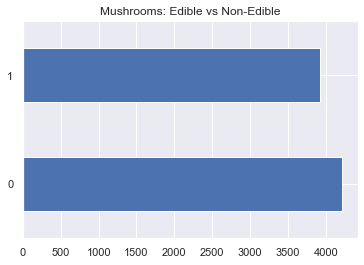

In [5]:
# Looking at data balance
df['class'].value_counts()[:20].plot(kind='barh',title='Mushrooms: Edible vs Non-Edible')

<AxesSubplot:title={'center':'Mushrooms: Bruises'}>

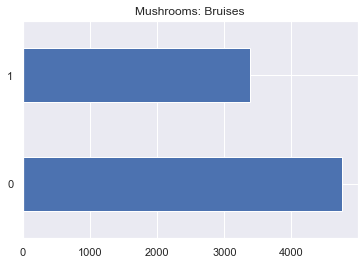

In [6]:
df['bruises'].value_counts()[:20].plot(kind='barh',title='Mushrooms: Bruises')

<AxesSubplot:title={'center':'Mushrooms: Gill-Attachment'}>

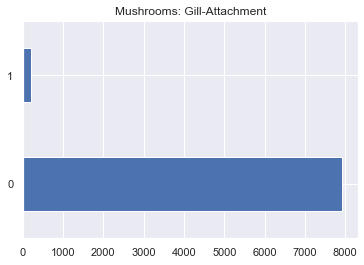

In [7]:
df['gill-attachment'].value_counts()[:20].plot(kind='barh',title='Mushrooms: Gill-Attachment')

<AxesSubplot:title={'center':'Mushrooms: Gill-Spacing'}>

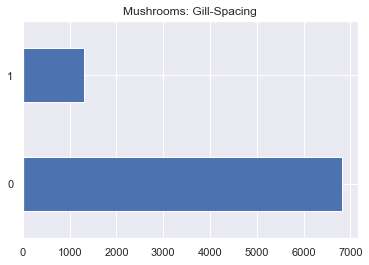

In [8]:
df['gill-spacing'].value_counts()[:20].plot(kind='barh',title='Mushrooms: Gill-Spacing')

<AxesSubplot:title={'center':'Mushrooms: Gill-Size'}>

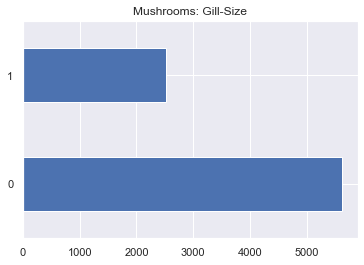

In [9]:
df['gill-size'].value_counts()[:20].plot(kind='barh',title='Mushrooms: Gill-Size')

<AxesSubplot:title={'center':'Mushrooms: Stalk-Shape'}>

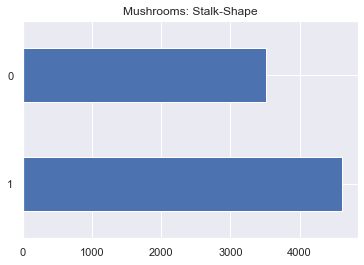

In [10]:
df['stalk-shape'].value_counts()[:20].plot(kind='barh',title='Mushrooms: Stalk-Shape')

In [11]:
# looking for any null data
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [12]:
def getDummies(df):
    '''Creates dummy variables from categorical variables, adds them
    to the dataframe and returns the new dataframe with dummy vars'''
    dummyDF = df.copy()
    catList = dummyDF.select_dtypes(include=['object']).columns.tolist()
    for i in catList:
        dummies = pd.get_dummies(dummyDF[i], prefix=i)
        dummyDF = pd.concat([dummyDF, dummies], axis=1)
    return dummyDF

In [13]:
# Add dummy variable columns to dataframes
df_dummies = getDummies(df)
#removing veil-type from data set since there is only one option
df_dummies.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,x,s,n,1,p,0,0,1,k,...,1,0,0,0,0,0,0,0,1,0
1,0,x,s,y,1,a,0,0,0,k,...,0,0,0,0,1,0,0,0,0,0
2,0,b,s,w,1,l,0,0,0,n,...,0,0,0,0,0,0,1,0,0,0
3,1,x,y,w,1,p,0,0,1,n,...,1,0,0,0,0,0,0,0,1,0
4,0,x,s,g,0,n,0,1,0,k,...,0,0,0,0,1,0,0,0,0,0


In [14]:
# removing columns that I dont need anymore now that they are dummy variables
df_dummies.drop(['cap-shape','cap-surface','cap-color','odor','gill-color','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'
],axis=1, inplace=True)
df_dummies.head(5)

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


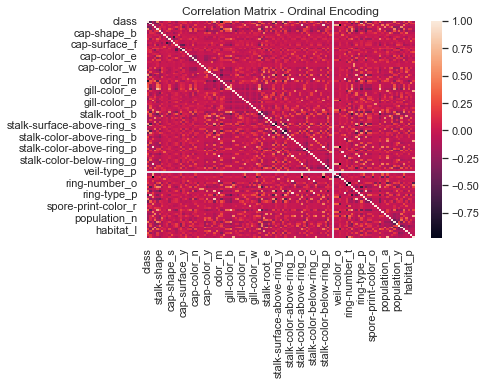

In [17]:
# Correlation Matrix Visual Heatmap of Ordinal Encoding Values
ax = sns.heatmap(df_dummies.corr())
ax.set_title('Correlation Matrix - Ordinal Encoding')
plt.show()
# Correlation List
corr = df_dummies.corr()
corr.to_csv('corr.csv',index=True)

In [16]:
# Exporting Data Set
df_dummies.to_csv('df_dummy.csv',index=True)